## IMDB-Reviews-Reaction-Tags-Predictor Project Notebook




## Project Introduction
Annually, thousands of movies compete for attention in a digitalized market. The accelerated process of digitizing material consumption has resulted in a significant proportion of audience members expressing their reviews through online channels, such as IMDB. The insights behind these reviews have the potential to inform decision-making in studios, improve review suggestions by considering emotional impact, and provide a more comprehensive understanding of the movies. Reaction-centric analysis can tailor movie recommendations, guide content production, and highlight the range of viewer reactions.

## The Problem Statement:
We aim to infer the potential reaction tags of each individual review. The existing labels within the dataset serve to classify reviews as either positive or negative, which may inadvertently obscure a range of moods, themes, and issues. The fundamental challenge of this project is to understand the underlying reactions and estimate the probability of diverse reactions in the texts, such as happiness, sadness, disgust, fear, surprise, anger, etc. It's common that there are multiple reaction themes in one single review, we have to dive deep into the text and find out the answer.

## Project Aim & Scope:
After data exploration and necessary data cleaning, we will re-label a subset of this dataset, defining new categories that encapsulate more specific sentiments and themes found in movie reviews. Then we will use machine learning models to build the classifier and do text analysis. Due to the extensive size of the IMDB dataset, the process of relabeling requires significant manual oversight. This oversight includes understanding the context, identifying themes, and assigning accurate labels. Additionally, there's a subsequent task of data exploration, data cleaning, text analysis and performance analysis


In [ ]:
# Environment
import tarfile
import os
import random


## Part One -- Data Exploration
*   We're using the IMDB Movies Dataset, which can be found at Hugging Face. This dataset contains a large number of movie reviews, making it an excellent resource for sentiment analysis and text classification tasks.

According to imdb - Hugging Face
> The dataset contains 25,000 highly polar movie reviews for training and another 25,000 for testing.

### Dataset Structures


> Indented block




Our examination of the dataset went beyond the basic positive/negative sentiment. We dug into the text to find these various emotional layers.


### Part Two -- Manual Labelling
The following part of the code will download the dataset and process it into random csv file contains 50 mixed positive and negative comments.

> *Everyone should generate their own .CSV file for labelling.


### Reaction Tags
*   Disgust
*   Disappointment
*   Sadness
*   Confusion
*   Anger
*   Fear
*   Indifference
*   Surprise
*   Interest
*   Happiness
*   Reflective

### Data Parparation

In [ ]:
# Parpare for the Data
# Download the data from stanford.edu
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -O /content/aclImdb_v1.tar.gz

--2023-11-27 05:17:27--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘/content/aclImdb_v1.tar.gz’

/content/aclImdb_v1 100%[===================>]  80.23M  4.90MB/s    in 21s     

2023-11-27 05:17:48 (3.90 MB/s) - ‘/content/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
# Extract the Dataset
with tarfile.open('/content/aclImdb_v1.tar.gz', "r:gz") as tar:
    tar.extractall(path='/content/')



In [ ]:
# Define the path
aclimdb_path = os.path.join('/content/', 'aclImdb')
os.listdir(aclimdb_path)
# Define the Train path
train_path = os.path.join(aclimdb_path, 'train')
os.listdir(train_path)

['unsupBow.feat',
 'urls_unsup.txt',
 'urls_pos.txt',
 'pos',
 'labeledBow.feat',
 'unsup',
 'neg',
 'urls_neg.txt']

In [ ]:
# Function to read a random file from a directory
def read_random_files(directory, num_files=2):
    files = os.listdir(directory)
    sample_files = random.sample(files, num_files)
    texts = []
    for file in sample_files:
        file_path = os.path.join(directory, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            texts.append(f.read())
    return texts

# Read random files from both 'neg' and 'pos' directories
neg_reviews = read_random_files(os.path.join(train_path, 'neg'), num_files=2)
pos_reviews = read_random_files(os.path.join(train_path, 'pos'), num_files=2)

neg_reviews, pos_reviews

(["I can't believe that in the 34 prior comments, nobody mentioned that this film is a blatant rip-off of Born Yesterday. A man is hired to bring an ostensibly dumb blonde up to the requirements of a gangster. Hired gun and blonde fall in love and live happily ever after. Gangster is left in the lurch. But Born Yesterday was an intelligent treatment whereas this is just so much fluff. Technicolor transfer to DVD is deplorable. Natalie Kalmus would be rolling over in her grave. Check out the paperboy. Recognize him? But, it's historically interesting to see the roots of Rock 'n Roll. Also interesting is Ewell's introduction to CinemaScope, a new format at the time.",
  'I would just like it to be known, that I do not often rate movies below a 5. I was originally very excited to see this movie. Its numerous trailer bumps on TV for several months made me REAALLY want to see this movie. So, the other night when I saw that it was available on FearNet on Demand, I got some popcorn and sat do

In [ ]:
import pandas as pd
# Prepare for the Random Generated file (50 per each) for manually labeling process
numofsamples = 750

# Function to create dataframe for the sample comments
def create_sample_dataframe(directory, classification, numofsamples):
    files = os.listdir(directory)
    sample_files = random.sample(files, numofsamples)
    data = []
    for file in sample_files:
        file_path = os.path.join(directory, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            data.append({'review': text, 'classification': classification})
    return pd.DataFrame(data)
# Create Data Frame for negative and postive comments
negative = create_sample_dataframe(os.path.join(train_path, 'neg'), 'negative', numofsamples)
positive = create_sample_dataframe(os.path.join(train_path, 'pos'), 'positive', numofsamples)

# Combine the Dataframe
sample_reviews_df = pd.concat([negative, positive], ignore_index=True)

# Mix the negative and postive comments
sample_reviews_df = sample_reviews_df.sample(frac=1).reset_index(drop=True)








In [ ]:
# Save it to csv file for labeling
sample_path = '/content/sample_comments.csv'
sample_reviews_df.to_csv(sample_path, index=False)

### Part 2
The Kappa Score

In [ ]:
import requests
import pandas as pd

file_urls = [
    'https://raw.githubusercontent.com/derrickyau9/IMDB-Review-Emotion_Rating-Predictor/main/CSVs/review_label_DY.csv',
    'https://raw.githubusercontent.com/derrickyau9/IMDB-Review-Emotion_Rating-Predictor/main/CSVs/review_label_SYF.csv',
    'https://raw.githubusercontent.com/derrickyau9/IMDB-Review-Emotion_Rating-Predictor/main/CSVs/review_label_WFY.csv',
    'https://raw.githubusercontent.com/derrickyau9/IMDB-Review-Emotion_Rating-Predictor/main/CSVs/review_label_ZCX.csv'
]


In [ ]:
from sklearn.metrics import cohen_kappa_score
from itertools import combinations

# Load the data from each file
dataframes = [pd.read_csv(url) for url in file_urls]

# List of reaction tags
reaction_tags = ['Disgust', 'Disappointment', 'Sadness', 'Confusion', 'Anger',
                 'Fear', 'Indifference', 'Surprise', 'Interest', 'Happiness',
                'Reflective']
# Function to calculate kappa for each pair of raters for a given tag
def calculate_kappa_for_tag(tag):
            kappa_values = []
            for (df1, df2) in combinations(dataframes, 2):
               kappa = cohen_kappa_score(df1[tag], df2[tag])
               kappa_values.append(kappa)
            return kappa_values
# Calculate kappa values for each tag
kappa_per_tag = {tag: calculate_kappa_for_tag(tag) for tag in reaction_tags}
# Average kappa values for each tag
average_kappa_per_tag = {tag: sum(values)/len(values) for tag, values in kappa_per_tag.items()}
# Overall average kappa
overall_average_kappa = sum(average_kappa_per_tag.values()) / len(average_kappa_per_tag)
# Print the results
print("Average Kappa per Tag:", average_kappa_per_tag)
print("Overall Average Kappa:", overall_average_kappa)



Average Kappa per Tag: {'Disgust': 0.8848210612916496, 'Disappointment': 0.7460043837378011, 'Sadness': 0.8383840031128299, 'Confusion': 0.8337074977054582, 'Anger': 0.7468161514398388, 'Fear': 1.0, 'Indifference': 0.8655113386350711, 'Surprise': 0.9451754385964911, 'Interest': 0.9133113167807273, 'Happiness': 0.6965584564511076, 'Reflective': 0.8777116206449239}
Overall Average Kappa: 0.8498182971268998


### Merged Review for 1500 Comments, Data Visuallization



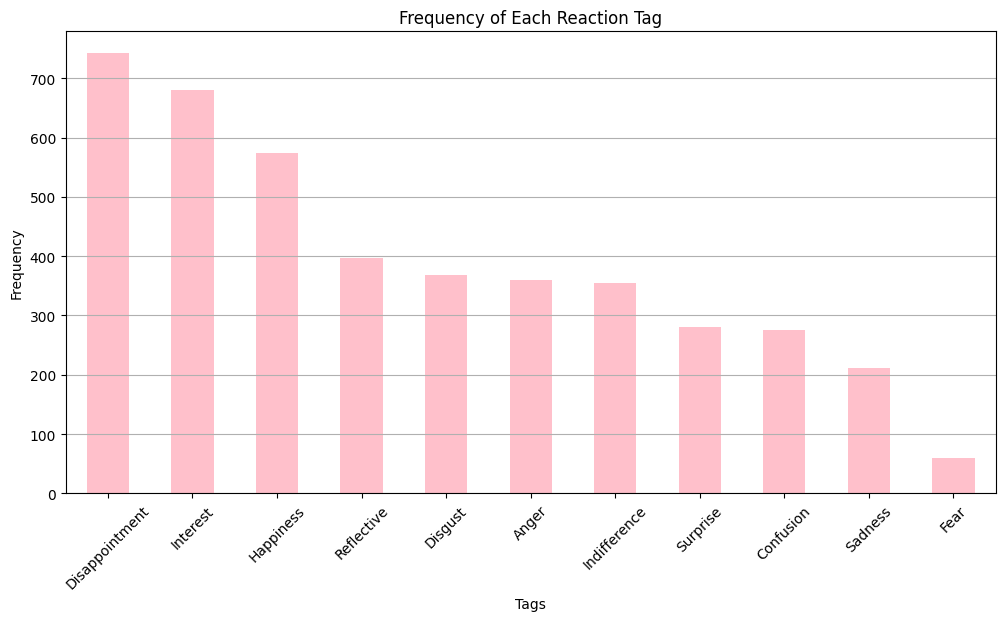

In [ ]:
import matplotlib.pyplot as plt
file_urls2 = 'https://raw.githubusercontent.com/derrickyau9/IMDB-Review-Emotion_Rating-Predictor/main/CSVs/Merged_Reviews(2).csv'
merged_review_df = pd.read_csv(file_urls2)

# Take out the columns
tag_columns = merged_review_df.columns[2:]
# Calculating the frequency
tag_frequencies = merged_review_df[tag_columns].sum()

# Plotting the frequencies
sort_tags = tag_frequencies.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sort_tags.plot(kind='bar', color='pink')
plt.title('Frequency of Each Reaction Tag')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Average Reactions per Comment: 0       3
1       3
2       3
3       3
4       2
       ..
1495    2
1496    4
1497    3
1498    5
1499    3
Length: 1500, dtype: int64


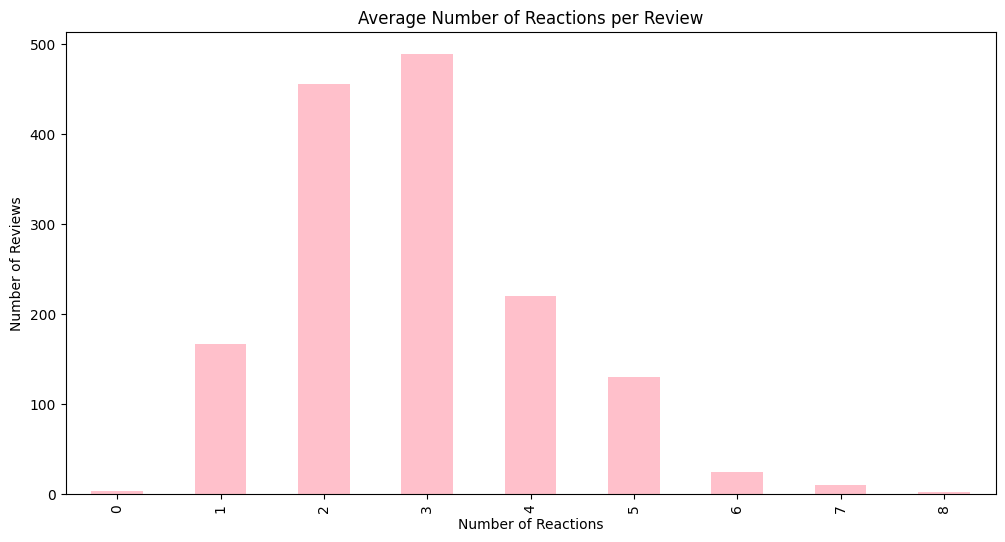

In [ ]:
# Calculate the average number of reactions per comment
reactions_per_comment = merged_review_df[tag_columns].sum(axis=1)
print("Average Reactions per Comment:", reactions_per_comment)

# Plot
plt.figure(figsize=(12, 6))
reactions_per_comment.value_counts().sort_index().plot(kind='bar', color='pink')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Reviews')
plt.title('Average Number of Reactions per Review')
plt.show()


In [ ]:
# Create an Dataframe for training set.
import os
import pandas as pd

def read_reviews_from_directory(directory_path):
    """
    Reads all the reviews from files in the given directory and returns a list of review texts.
    """
    reviews = []
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            reviews.append(file.read())
    return reviews

# Paths to the positive and negative review directories
neg_reviews_path = os.path.join(train_path, 'neg')
pos_reviews_path = os.path.join(train_path, 'pos')

# Reading the reviews
neg_reviews = read_reviews_from_directory(neg_reviews_path)
pos_reviews = read_reviews_from_directory(pos_reviews_path)

# Creating a DataFrame
train_reviews_df = pd.DataFrame({
    'review': neg_reviews + pos_reviews,
    'classification': ['negative'] * len(neg_reviews) + ['positive'] * len(pos_reviews)
})

# Create an Dataframe for Testing set.
# Export all comments into csv
# Path to the 'test' directory
test_dir_path = f'/content/aclImdb/test'

# Paths to the positive and negative review directories in the test set
test_neg_reviews_path = os.path.join(test_dir_path, 'neg')
test_pos_reviews_path = os.path.join(test_dir_path, 'pos')

# Reading the reviews from the test set
test_neg_reviews = read_reviews_from_directory(test_neg_reviews_path)
test_pos_reviews = read_reviews_from_directory(test_pos_reviews_path)

# Creating a DataFrame for the test set
test_reviews_df = pd.DataFrame({
    'review': test_neg_reviews + test_pos_reviews,
    'classification': ['negative'] * len(test_neg_reviews) + ['positive'] * len(test_pos_reviews)
})


# Combining training and test data
combined_reviews_df = pd.concat([train_reviews_df, test_reviews_df], ignore_index=True)

# Display the first few rows of the combined dataframe
combined_reviews_df.head()

review classification
0  I have seen bad films but this took the p***. ...       negative
1  -might contain spoilers... but believe me, thi...       negative
2  It's nothing more than a weird coincidence tha...       negative
3  Emma is my favourite Jane Austen novel - Emma ...       negative
4  How has this piece of crap stayed on TV this l...       negative

In [ ]:
# This part of the code will be generate an CSV file for processing.
# Define the path for the output CSV file for the combined dataset
combined_output_csv_path = '/content/50ksample_comments.csv'

# Exporting the combined DataFrame to a CSV file
combined_reviews_df.to_csv(combined_output_csv_path, index=False)

combined_output_csv_path



'/content/50ksample_comments.csv'

### Data Visualization

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

all_reviews = ' '.join(review for review in combined_reviews_df['review'])


wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(all_reviews)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-29-96bfe080c8b6>:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


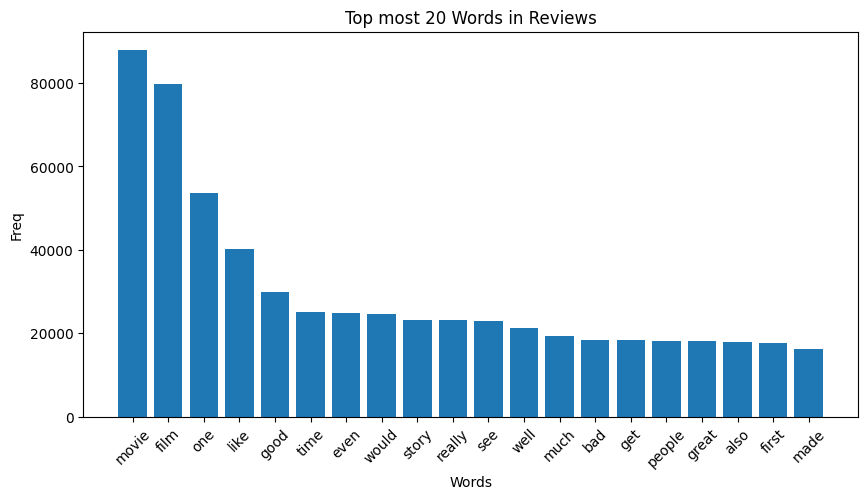

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from bs4 import BeautifulSoup
!pip install contractions
import contractions
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


STOPWORDS = set(stopwords.words('english'))
custom_stopwords = {'br', 's', 't'}  # Add any other unwanted words here
STOPWORDS.update(custom_stopwords)

# Function to clean text data
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # Remove non-word characters and convert to lower case
    text = re.sub(r'\W+', ' ', text.lower())

    return text

combined_reviews_df['cleaned_review'] = combined_reviews_df['review'].apply(clean_text)
words = re.findall(r'\w+', ' '.join(combined_reviews_df['cleaned_review']))
filtered_words = [word for word in words if word not in STOPWORDS]


# Plot the Mathplotlib
words = re.findall(r'\w+', ' '.join(combined_reviews_df['review']).lower())
filtered_words = [word for word in words if word not in STOPWORDS]
word_counts = Counter(filtered_words)

N = 20
cmwords = word_counts.most_common(N)
words, counts = zip(*cmwords)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Freq')
plt.xticks(rotation=45)
plt.title('Top most 20 Words in Reviews')
plt.show()

<ipython-input-29-96bfe080c8b6>:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


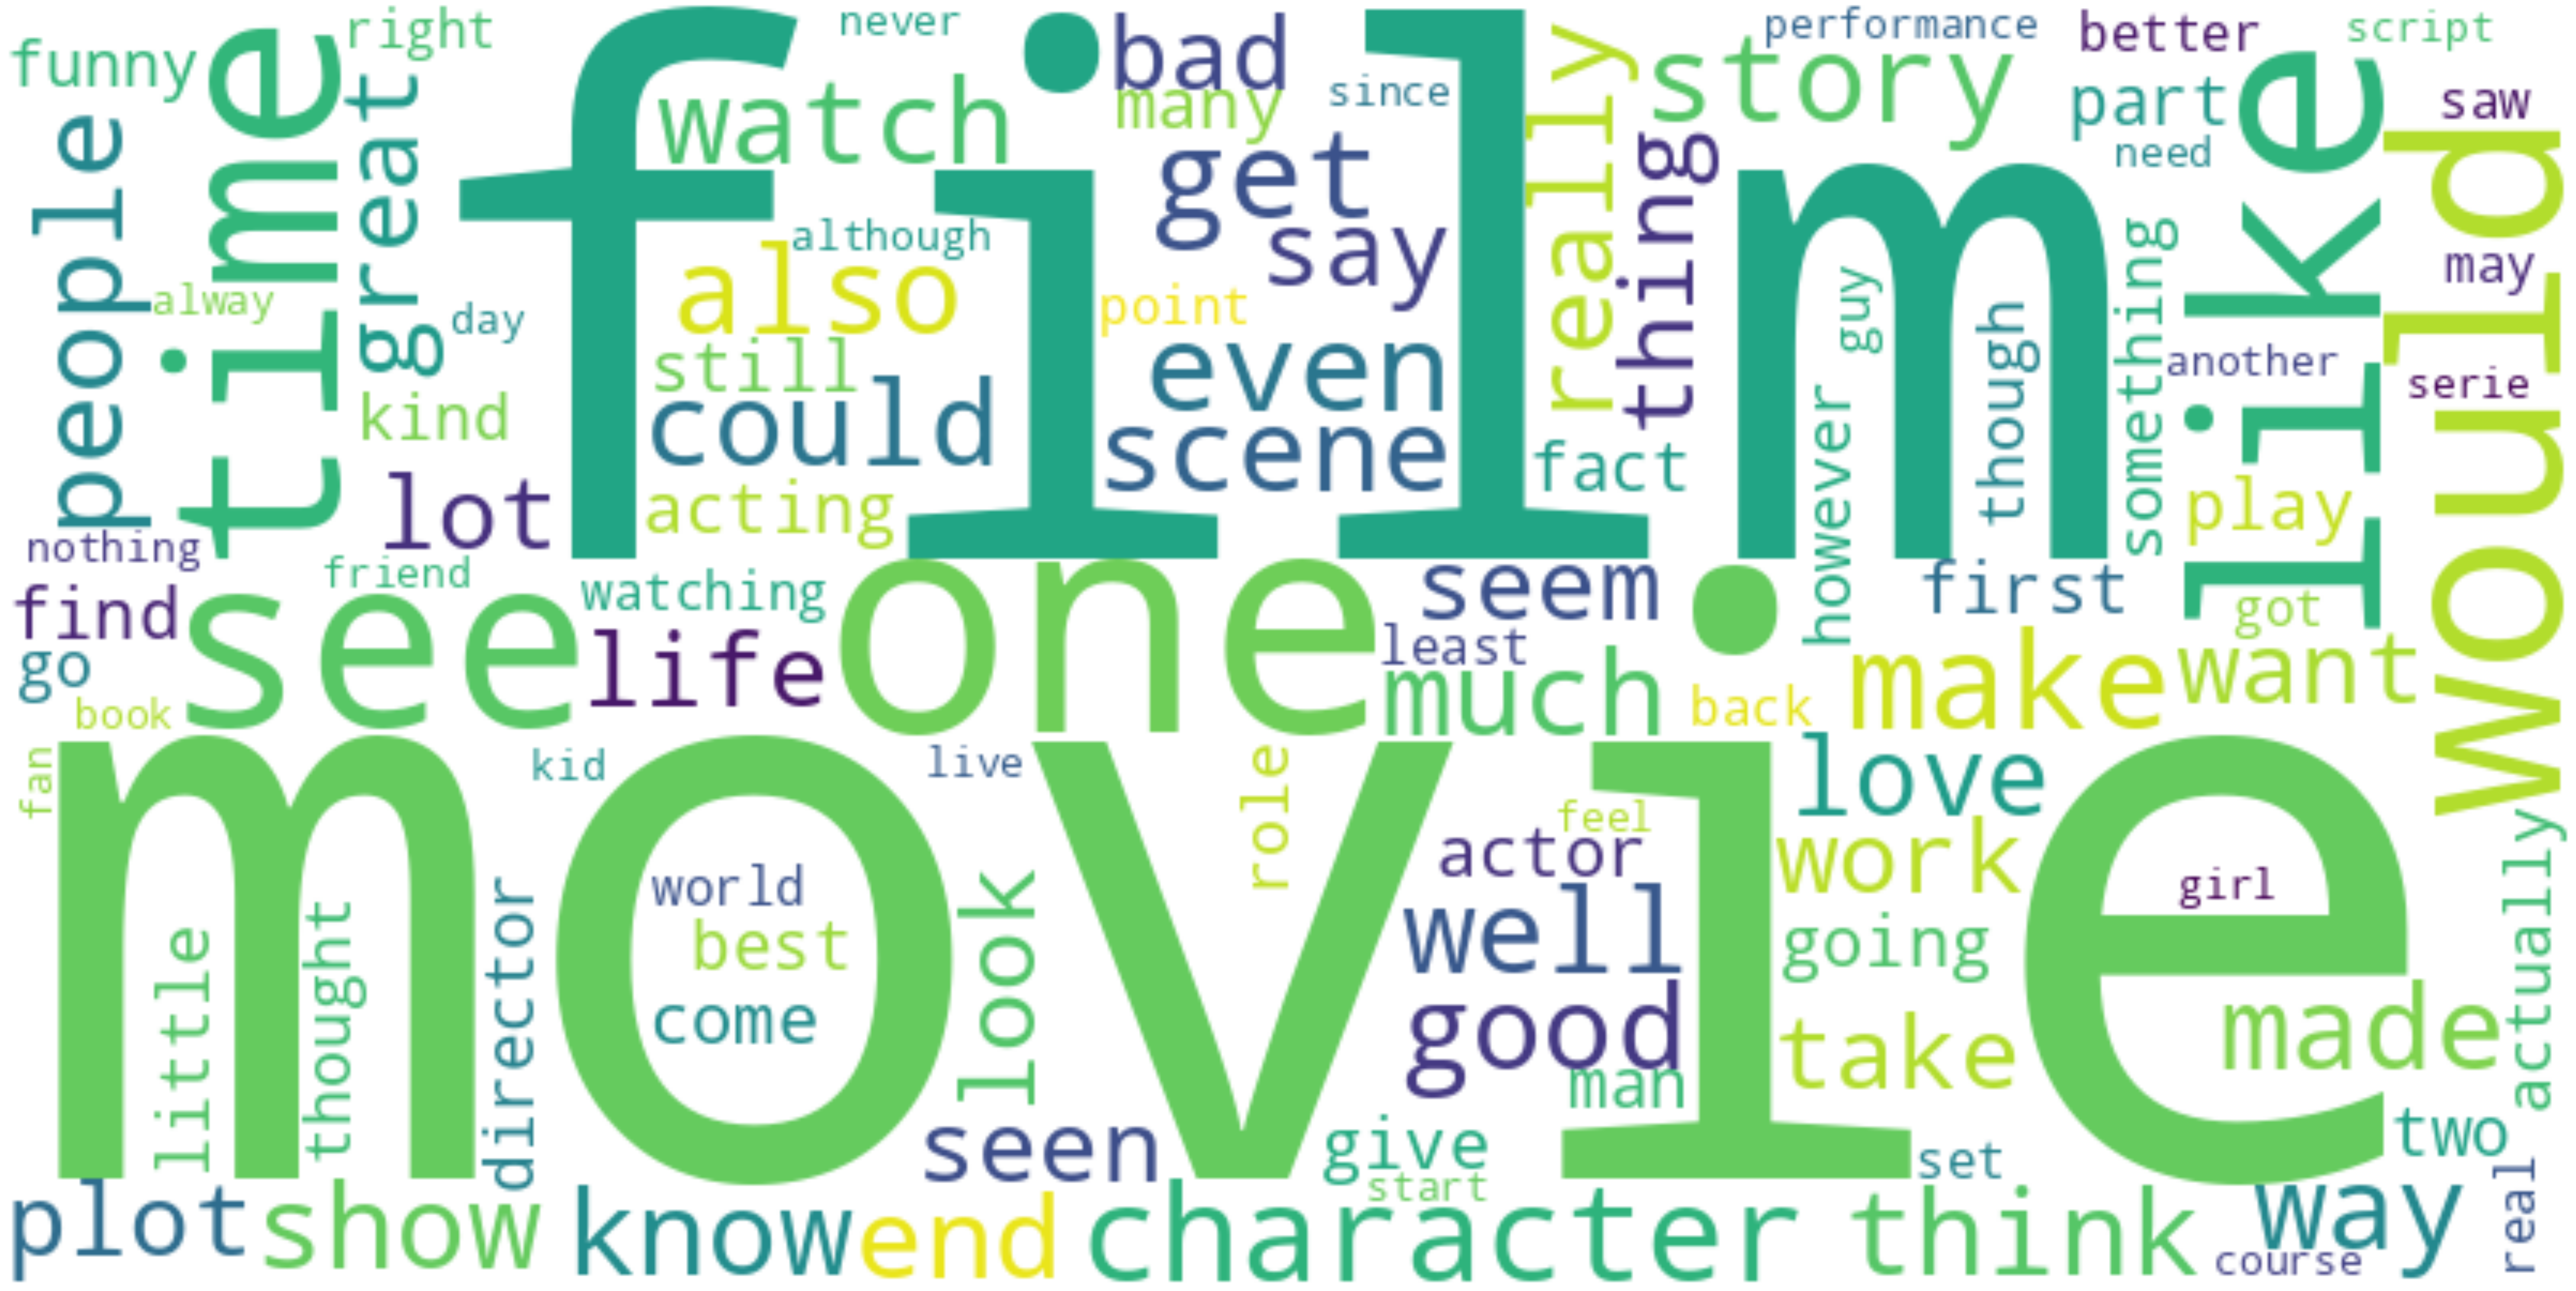

In [ ]:
# Plotting the WordCloud
combined_reviews_df['cleaned_review'] = combined_reviews_df['review'].apply(clean_text)
cleaned_text = ' '.join(combined_reviews_df['cleaned_review'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=800, height=400).generate(cleaned_text)

plt.figure(figsize=(100, 100))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joining the tokens back into text
    return ' '.join(tokens)

combined_reviews_df['cleaned_review'] = combined_reviews_df['review'].apply(preprocess_text)


cleaned_review
0  i have seen bad films but this took the p made...
1   might contain spoilers but believe me this mo...
2  it is nothing more than a weird coincidence th...
3  emma is my favourite jane austen novel emma is...
4  how has this piece of crap stayed on tv this l...

# Model Selection

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install keras==2.12.0
!pip install tensorflow==2.12.0
!pip install imblearn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from imblearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickyau9/IMDB-Review-Emotion_Rating-Predictor/main/CSVs/Merged_Reviews_Tag_Reduced.csv')

def preprocess_text(text):
    # Text Cleaning: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Expand Contractions (e.g., "I'm" -> "I am")
    text = contractions.fix(text)

    # Perform case normalization
    text = text.lower()

    # Tokenization: Split the text into words
    tokens = word_tokenize(text)

    # Stop Word Removal: Remove common words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization: Reduce words to their base form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joining the tokens back into text
    return ' '.join(tokens)

In [ ]:
df.head()

Review  Disgust  Disappointment  \
0  Perhaps I'm not a sophisticate. This and Close...        1               1   
1  I saw his film at the Ann Arbor Film Festival....        1               1   
2  Dark Rising is your typical bad, obviously qui...        0               1   
3  SHALLOW GRAVE begins with either a tribute or ...        0               1   
4  Many of the American people would say...What??...        0               0   

   Sadness  Confusion  Anger  Fear  Indifference  Surprise  Interest  \
0        0          0      0     0             1         0         0   
1        0          0      1     0             0         0         0   
2        0          1      0     0             1         0         0   
3        0          0      0     0             0         1         1   
4        0          0      0     0             0         0         1   

   Happiness  Reflective  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           1

In [ ]:
from nltk.tokenize import word_tokenize

# Apply the preprocessing to the review column
df['Review'] = df['Review'].apply(preprocess_text)

# Check the cleaned review
df.head()

Review  Disgust  Disappointment  \
0  perhaps sophisticate . closer two supposedly c...        1               1   
1  saw film ann arbor film festival . film studen...        1               1   
2  dark rising typical bad , obviously quickly pr...        0               1   
3  shallow grave begin either tribute rip shower ...        0               1   
4  many american people would say ... ? ? ? openi...        0               0   

   Sadness  Confusion  Anger  Fear  Indifference  Surprise  Interest  \
0        0          0      0     0             1         0         0   
1        0          0      1     0             0         0         0   
2        0          1      0     0             1         0         0   
3        0          0      0     0             0         1         1   
4        0          0      0     0             0         0         1   

   Happiness  Reflective  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           1

# TF-IDF Vectorize

In [ ]:
# Separate features and target labels
X = df['Review']
y = df.drop(['Review'], axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature extraction with TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
probabilities = y_train.sum() / len(y_train)

random_predictions = []
for _ in range(len(y_test)):
    prediction = [np.random.choice([0, 1], p=[1-p, p]) for p in probabilities]
    random_predictions.append(prediction)


## **Baseline Choice**

In [ ]:
probabilities = y_train.sum() / len(y_train)

# Store calculation results
micro_precisions = []
micro_recalls = []
micro_f1s = []
hamming_losses = []

In [ ]:
# Perform 10 rounds of prediction
for _ in range(10):
    random_predictions = []
    for _ in range(len(y_test)):
        prediction = [np.random.choice([0, 1], p=[1-p, p]) for p in probabilities]
        random_predictions.append(prediction)

    random_predictions = np.array(random_predictions)

    # Calculate the metrics
    micro_precision = precision_score(y_test, random_predictions, average='micro')
    micro_recall = recall_score(y_test, random_predictions, average='micro')
    micro_f1 = f1_score(y_test, random_predictions, average='micro')
    hamming_loss_val = hamming_loss(y_test, random_predictions)

    # Record the results
    micro_precisions.append(micro_precision)
    micro_recalls.append(micro_recall)
    micro_f1s.append(micro_f1)
    hamming_losses.append(hamming_loss_val)

# Print the results
print("Micro-Precision:", micro_precisions)
print("Micro-Recall:", micro_recalls)
print("Micro-F1 Scores:", micro_f1s)
print("Hamming Losses:", hamming_losses)

Micro-Precision: [0.32424537487828625, 0.33575978161965425, 0.33547794117647056, 0.3477859778597786, 0.34429223744292237, 0.32181818181818184, 0.3196060877350045, 0.31479736098020733, 0.31691449814126393, 0.30583873957367935]
Micro-Recall: [0.3097674418604651, 0.34325581395348836, 0.3395348837209302, 0.35069767441860467, 0.35069767441860467, 0.3293023255813953, 0.33209302325581397, 0.31069767441860463, 0.3172093023255814, 0.30697674418604654]
Micro-F1 Scores: [0.3168411037107517, 0.3394664213431463, 0.3374942209893666, 0.349235757295044, 0.3474654377880184, 0.3255172413793104, 0.3257299270072993, 0.31273408239700373, 0.3170618317061832, 0.3064066852367688]
Hamming Losses: [0.3481212121212121, 0.3481212121212121, 0.3473939393939394, 0.3406060606060606, 0.3432727272727273, 0.35563636363636364, 0.3583030303030303, 0.3558787878787879, 0.3561212121212121, 0.36218181818181816]


# 1.1 Random Forest Hyperparameter Tuning¶

In [ ]:
# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'estimator__max_depth': [None, 10, 20, 30], # Maximum depth of the tree
}

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Wrap the model with MultiOutputClassifier
multi_target_forest = MultiOutputClassifier(random_forest_model, n_jobs=-1)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(multi_target_forest, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'estimator__max_depth': None, 'estimator__n_estimators': 50}


# 1.2 Evaluation and Metrics for Tuned Random Forest

In [ ]:
# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Calculate micro-average Precision
micro_precision = precision_score(y_test, y_pred, average='micro')
print("Micro-average Precision:", micro_precision)

# Calculate micro-average Recall
micro_recall = recall_score(y_test, y_pred, average='micro')
print("Micro-average Recall:", micro_recall)

# Calculate micro-average F1 Score
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro-average F1 Score:", micro_f1)

# Calculate Hamming Loss
hamming_loss_val = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming_loss_val)

Micro-average Precision: 0.7407407407407407
Micro-average Recall: 0.26046511627906976
Micro-average F1 Score: 0.38540949759119064
Hamming Loss: 0.21648484848484847


# 2.1 MLP Hyperparameter Tuning¶

In [ ]:
def create_mlp_model(neurons=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_tfidf.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_mlp_model, epochs=20, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'neurons': [64, 128, 256],   # Example parameters
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='f1_micro')

# Convert TF-IDF data to dense format
X_train_tfidf_dense = X_train_tfidf.toarray()

# Fit GridSearchCV
grid_result = grid.fit(X_train_tfidf_dense, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-33-fbc49d230d64>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_mlp_model, epochs=20, batch_size=32, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best: nan using {'dropout_rate': 0.3, 'neurons': 64}


# 2.2 Evaluation and Metrics for Tuned MLP

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_tfidf_dense = X_train_tfidf.toarray()

# Train the model
model.fit(X_train_tfidf_dense, y_train, epochs=20, batch_size=32, validation_split=0.2)

X_test_tfidf_dense = X_test_tfidf.toarray()
y_pred = model.predict(X_test_tfidf_dense)

Epoch 1/20
29/29 [==============================] - 2s 11ms/step - loss: 0.6722 - accuracy: 0.1767 - val_loss: 0.6290 - val_accuracy: 0.3378
Epoch 2/20
29/29 [==============================] - 0s 5ms/step - loss: 0.5765 - accuracy: 0.2256 - val_loss: 0.5402 - val_accuracy: 0.3378
Epoch 3/20
29/29 [==============================] - 0s 5ms/step - loss: 0.5272 - accuracy: 0.2889 - val_loss: 0.5279 - val_accuracy: 0.3556
Epoch 4/20
29/29 [==============================] - 0s 5ms/step - loss: 0.4890 - accuracy: 0.3344 - val_loss: 0.5078 - val_accuracy: 0.3733
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 0.4176 - accuracy: 0.4033 - val_loss: 0.4798 - val_accuracy: 0.3956
Epoch 6/20
29/29 [==============================] - 0s 5ms/step - loss: 0.3603 - accuracy: 0.4311 - val_loss: 0.4600 - val_accuracy: 0.4044
Epoch 7/20
29/29 [==============================] - 0s 5ms/step - loss: 0.3181 - accuracy: 0.4367 - val_loss: 0.4583 - val_accuracy: 0.4222
Epoch 8/20
29/29 [=

In [ ]:
y_pred_binary = (y_pred > 0.25).astype(int)

# Calculate micro-average Precision
micro_precision = precision_score(y_test, y_pred_binary, average='micro')
print("Micro-average Precision:", micro_precision)

# Calculate micro-average Recall
micro_recall = recall_score(y_test, y_pred_binary, average='micro')
print("Micro-average Recall:", micro_recall)

# Calculate micro-average F1 Score
micro_f1 = f1_score(y_test, y_pred_binary, average='micro')
print("Micro-average F1 Score:", micro_f1)

# Calculate Hamming Loss
hamming_loss_val = hamming_loss(y_test, y_pred_binary)
print("Hamming Loss:", hamming_loss_val)

Micro-average Precision: 0.6309921962095875
Micro-average Recall: 0.5265116279069767
Micro-average F1 Score: 0.5740365111561866
Hamming Loss: 0.20363636363636364


# 2.3 T-test

In [ ]:
micro_precision_mlp = []
micro_recall_mlp = []
micro_f1_mlp = []
hamming_loss_val_mlp = []
for i in range(10):
    # Define the model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_tfidf.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    X_train_tfidf_dense = X_train_tfidf.toarray()

    # Train the model
    model.fit(X_train_tfidf_dense, y_train, epochs=20, batch_size=32, validation_split=0.2)

    X_test_tfidf_dense = X_test_tfidf.toarray()
    y_pred = model.predict(X_test_tfidf_dense)

    y_pred_binary = (y_pred > 0.25).astype(int)

    micro_precision_mlp.append(precision_score(y_test, y_pred_binary, average='micro'))
    micro_recall_mlp.append(recall_score(y_test, y_pred_binary, average='micro'))
    micro_f1_mlp.append(f1_score(y_test, y_pred_binary, average='micro'))
    hamming_loss_val_mlp.append(hamming_loss(y_test, y_pred_binary))

print('micro_precision_mlp =', micro_precision_mlp)
print('micro_recall_mlp =', micro_recall_mlp)
print('micro_f1_mlp =', micro_f1_mlp)
print('hamming_loss_val_mlp =', hamming_loss_val_mlp)

In [ ]:
#H0: Accuracy of MLP model is not improving compared with baseline.
#Ha: Accuracy of MLP model is improving.

from scipy import stats
# micro_precisions
t_stat, p_val = stats.ttest_rel(micro_precisions,micro_precision_mlp,alternative='less')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
if p_val < 0.05:
    print("We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

In [ ]:
# micro_recall
t_stat, p_val = stats.ttest_rel(micro_recalls,micro_recall_mlp,alternative='less')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
if p_val < 0.05:
    print("We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

In [ ]:
# micro_f1s
t_stat, p_val = stats.ttest_rel(micro_f1s,micro_f1_mlp,alternative='less')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
if p_val < 0.05:
    print("We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

In [ ]:
# hamming_losses
t_stat, p_val = stats.ttest_rel(hamming_losses,hamming_loss_val_mlp,alternative='greater')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
if p_val < 0.05:
    print("We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

# 2.4 Error Analysis

In [ ]:
data = np.array(df_predicted).transpose()

labels = ['Predicted', 'Actual']
groups = [
    "Disgust", "Disappointment", "Sadness", "Confusion", "Anger", "Fear",
    "Indifference", "Surprise", "Interest", "Happiness", "Reflective"
]

# define figure and axis objects
fig, ax = plt.subplots(figsize=(12, 7))
#fig, ax = plt.subplots()

# plot the grouped bar chart
width = 0.25
x = np.arange(len(groups))
ax.bar(x - width/2, data[0], width, label=labels[0])
ax.bar(x + width/2, data[1], width, label=labels[1])

# add text annotations to each bar
for i, j in enumerate(data):
   for x_val, y_val in zip(x, j):
      ax.annotate(str(y_val), xy=(x_val+i*width-width/2, y_val), ha='center', va='bottom')

# add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_xticklabels(emotion_labels, fontsize=12, rotation=45)
ax.set_xlabel('Groups')
ax.set_ylabel('Count')
ax.legend()
plt.show()

In [ ]:
# Calculate the sum for each label (column)
actual_label_counts = y_test.sum(axis=0)
predicted_label_counts = y_pred_binary.sum(axis=0)

# The emotion labels
emotion_labels = [
    "Disgust", "Disappointment", "Sadness", "Confusion", "Anger", "Fear",
    "Indifference", "Surprise", "Interest", "Happiness", "Reflective"
]

# Set up the figure and axis for two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for actual label distribution
axs[0].pie(actual_label_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=140, counterclock=False, textprops={'fontsize': 16})
axs[0].set_title('Proportion of Actual Labels', fontsize=17)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for predicted label distribution
axs[1].pie(predicted_label_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=140, counterclock=False, textprops={'fontsize': 16})
axs[1].set_title('Proportion of Predictions', fontsize=17)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

In [ ]:
# Sum the Actual for each sentiment category
actual_negative_count = y_test.iloc[:, :6].sum(axis=1).sum()
actual_neutral_count = y_test.iloc[:, 6].sum()
actual_positive_count = y_test.iloc[:, 7:].sum(axis=1).sum()

# Sum the predictions for each sentiment category
predicted_negative_count = y_pred_binary[:, :6].sum(axis=1).sum()
predicted_neutral_count = y_pred_binary[:, 6].sum()
predicted_positive_count = y_pred_binary[:, 7:].sum(axis=1).sum()

# Counts for each sentiment category
actual_sentiment_counts = [actual_negative_count, actual_neutral_count, actual_positive_count]
predicted_sentiment_counts = [predicted_negative_count, predicted_neutral_count, predicted_positive_count]
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Set up the figure and axis for two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for actual sentiment label distribution
axs[0].pie(actual_sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'gray', 'green'], textprops={'fontsize': 18})
axs[0].set_title('Proportion of Actual Sentiment Labels', fontsize=19)
axs[0].axis('equal')

# Pie chart for predicted sentiment label distribution
axs[1].pie(predicted_sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140, colors=['red', 'gray', 'green'], textprops={'fontsize': 18})
axs[1].set_title('Proportion of Predicted Sentiment Labels', fontsize=19)
axs[1].axis('equal')

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Data setup
emotion_labels = ["Disgust", "Disappointment", "Sadness", "Confusion", "Anger", "Fear",
                  "Indifference", "Surprise", "Interest", "Happiness", "Reflective"]
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_binary, average=None)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
width = 0.25
pos = list(range(len(precision)))

# Plotting bars with data labels
for i in range(len(precision)):
    ax.bar(i - width, precision[i], width, alpha=0.7, color=colors[0])
    ax.bar(i, recall[i], width, alpha=0.7, color=colors[1])
    ax.bar(i + width, f1_score[i], width, alpha=0.7, color=colors[2])

    ax.text(i - width, precision[i] + 0.02, f'{precision[i]:.2f}', ha='center', va='bottom')
    ax.text(i, recall[i] + 0.02, f'{recall[i]:.2f}', ha='center', va='bottom')
    ax.text(i + width, f1_score[i] + 0.02, f'{f1_score[i]:.2f}', ha='center', va='bottom')

# Finalizing plot
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Enhanced Precision, Recall, and F1-Score for Each Label', fontsize=16)
ax.set_xticks([p for p in pos])
ax.set_xticklabels(emotion_labels, fontsize=12, rotation=45)
ax.set_ylim(0, 1.1)
ax.legend(['Precision', 'Recall', 'F1-Score'], loc='upper left', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay
# multilabel_confusion_matrix(y_test, y_pred_binary)
f, axes = plt.subplots(3, 4, figsize=(25, 15))
axes[2,3].set_axis_off()
axes = axes.ravel()

for i in range(11):
    disp = ConfusionMatrixDisplay(confusion_matrix(np.array(y_test)[:, i],
                                                   y_pred_binary[:, i]),
                                  display_labels=[0, i])
    disp.plot(ax=axes[i], values_format='.4g')
    #disp.ax_.set_title(f'class {i}')
    disp.ax_.set_title(emotion_labels[i])
    if i<10:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)


plt.show()

# 3.1 CNN Hyperparameter Tuning

In [ ]:
# Parameters
vocab_size = 25000  # Size of the vocabulary
max_length = 100    # Maximum length of each review

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])

X = pad_sequences(sequences, maxlen=max_length)

# Assuming the labels are in binary format in the DataFrame and named as 'Label1', 'Label2', etc.
label_columns = ['Disgust', 'Disappointment', 'Sadness', 'Confusion', 'Anger', 'Fear', 'Indifference', \
                 'Surprise', 'Interest', 'Happiness', 'Reflective']
y = df[label_columns].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def create_cnn_model(num_filters=128, kernel_size=5, embedding_dim=100, max_length=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'num_filters': [64, 128, 256],
    'kernel_size': [3, 5, 7],
    'embedding_dim': [50, 100, 150]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='f1_micro')

# Fit GridSearchCV
grid_result = grid.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-56-411721d2d6a1>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


TerminatedWorkerError: ignored

# 3.2 Evaluation and Metrics for Tuned CNN

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(64, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
29/29 [==============================] - 7s 171ms/step - loss: 0.6446 - accuracy: 0.2322 - val_loss: 0.5842 - val_accuracy: 0.2622
Epoch 2/10
29/29 [==============================] - 4s 135ms/step - loss: 0.5397 - accuracy: 0.2956 - val_loss: 0.5447 - val_accuracy: 0.2622
Epoch 3/10
29/29 [==============================] - 5s 164ms/step - loss: 0.5175 - accuracy: 0.3022 - val_loss: 0.5403 - val_accuracy: 0.2622
Epoch 4/10
29/29 [==============================] - 4s 130ms/step - loss: 0.5050 - accuracy: 0.3544 - val_loss: 0.5399 - val_accuracy: 0.2622
Epoch 5/10
29/29 [==============================] - 3s 92ms/step - loss: 0.4869 - accuracy: 0.4044 - val_loss: 0.5372 - val_accuracy: 0.2711
Epoch 6/10
29/29 [==============================] - 4s 122ms/step - loss: 0.4535 - accuracy: 0.4722 - val_loss: 0.5291 - val_accuracy: 0.2622
Epoch 7/10
29/29 [==============================] - 4s 128ms/step - loss: 0.3881 - accuracy: 0.4656 - val_loss: 0.5176 - val_accuracy: 0.2667
Epoch 8

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.25).astype(int)

# Calculate micro-average Precision
micro_precision = precision_score(y_test, y_pred_binary, average='micro')
print("Micro-average Precision:", micro_precision)

# Calculate micro-average Recall
micro_recall = recall_score(y_test, y_pred_binary, average='micro')
print("Micro-average Recall:", micro_recall)

# Calculate micro-average F1 Score
micro_f1 = f1_score(y_test, y_pred_binary, average='micro')
print("Micro-average F1 Score:", micro_f1)

# Calculate Hamming Loss
hamming_loss_val = hamming_loss(y_test, y_pred_binary)
print("Hamming Loss:", hamming_loss_val)

12/12 [==============================] - 0s 3ms/step
Micro-average Precision: 0.5388940955951266
Micro-average Recall: 0.5560928433268859
Micro-average F1 Score: 0.5473584007615422
Hamming Loss: 0.23054545454545455


# 4.1 LSTM Hyperparameter Tuning

In [ ]:
def create_lstm_model(lstm_units=128, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units // 2))  # Using half the number of units in the second LSTM layer
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'lstm_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.5],
    'optimizer': ['adam', 'rmsprop']
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='f1_micro')

# Fit GridSearchCV
grid_result = grid.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-58-0508e8899717>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best: nan using {'dropout_rate': 0.2, 'lstm_units': 64, 'optimizer': 'adam'}


# 4.2 Evaluation and Metrics for LSTM

In [ ]:
# Parameters
vocab_size = 25000  # Size of the vocabulary
max_length = 100    # Maximum length of each review

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])

X = pad_sequences(sequences, maxlen=max_length)

# Assuming the labels are in binary format in the DataFrame and named as 'Label1', 'Label2', etc.
label_columns = ['Disgust', 'Disappointment', 'Sadness', 'Confusion', 'Anger', 'Fear', 'Indifference', \
                 'Surprise', 'Interest', 'Happiness', 'Reflective']
y = df[label_columns].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))  # Adjust the number of units to match the number of labels

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 13s 206ms/step - loss: 0.5884 - accuracy: 0.2650 - val_loss: 0.5166 - val_accuracy: 0.2633
Epoch 2/10
38/38 [==============================] - 6s 150ms/step - loss: 0.5371 - accuracy: 0.2750 - val_loss: 0.5173 - val_accuracy: 0.2633
Epoch 3/10
38/38 [==============================] - 6s 147ms/step - loss: 0.5347 - accuracy: 0.2675 - val_loss: 0.5152 - val_accuracy: 0.2633
Epoch 4/10
38/38 [==============================] - 4s 114ms/step - loss: 0.5362 - accuracy: 0.2758 - val_loss: 0.5149 - val_accuracy: 0.2633
Epoch 5/10
38/38 [==============================] - 5s 120ms/step - loss: 0.5348 - accuracy: 0.2800 - val_loss: 0.5170 - val_accuracy: 0.2633
Epoch 6/10
38/38 [==============================] - 3s 93ms/step - loss: 0.5342 - accuracy: 0.2367 - val_loss: 0.5165 - val_accuracy: 0.2633
Epoch 7/10
38/38 [==============================] - 3s 71ms/step - loss: 0.5345 - accuracy: 0.2700 - val_loss: 0.5160 - val_accuracy: 0.2633
Epoch 8

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.25).astype(int)

# Calculate micro-average Precision
micro_precision = precision_score(y_test, y_pred_binary, average='micro')
print("Micro-average Precision:", micro_precision)

# Calculate micro-average Recall
micro_recall = recall_score(y_test, y_pred_binary, average='micro')
print("Micro-average Recall:", micro_recall)

# Calculate micro-average F1 Score
micro_f1 = f1_score(y_test, y_pred_binary, average='micro')
print("Micro-average F1 Score:", micro_f1)

# Calculate Hamming Loss
hamming_loss_val = hamming_loss(y_test, y_pred_binary)
print("Hamming Loss:", hamming_loss_val)

10/10 [==============================] - 0s 6ms/step
Micro-average Precision: 0.5375939849624061
Micro-average Recall: 0.34624697336561744
Micro-average F1 Score: 0.4212076583210604
Hamming Loss: 0.2381818181818182


## Comparison of F1 between MLP and CNN

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickyau9/IMDB-Review-Emotion_Rating-Predictor/main/CSVs/Merged_Reviews_Tag_Reduced.csv')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joining the tokens back into text
    return ' '.join(tokens)

# Apply the preprocessing to the review column
df['Review'] = df['Review'].apply(preprocess_text)

In [ ]:
# Separate features and target labels
X = df['Review']
y = df.drop(['Review'], axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature extraction with TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Initialize a list to record the micro F1 scores
micro_f1_scores_MLP = []

hamming_loss_val_MLP = []

# Conduct training and evaluation 10 times
for i in range(10):
    # Define the model
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_tfidf.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_tfidf.toarray(), y_train, epochs=20, batch_size=32, validation_split=0.2)

    # Predict
    y_pred = model.predict(X_test_tfidf.toarray())
    y_pred_binary = (y_pred > 0.25).astype(int)

    # Calculate and record the micro-average F1 score
    micro_f1 = f1_score(y_test, y_pred_binary, average='micro')
    micro_f1_scores_MLP.append(micro_f1)

    hamming_loss_val = hamming_loss(y_test, y_pred_binary)
    hamming_loss_val_MLP.append(hamming_loss_val)

    print(f"Run {i+1}, Micro-average F1 Score: {micro_f1}")
    print(f"Run {i+1}, Hamming_loss: {hamming_loss_val}")

# Print all the micro-average F1 scores
print("All Micro-average F1 Scores:", micro_f1_scores_MLP)

print("All Hamming_loss:", hamming_loss_val_MLP)

In [ ]:
# Parameters
vocab_size = 25000  # Size of the vocabulary
max_length = 100    # Maximum length of each review

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])

X = pad_sequences(sequences, maxlen=max_length)

# Assuming the labels are in binary format in the DataFrame and named as 'Label1', 'Label2', etc.
label_columns = ['Disgust', 'Disappointment', 'Sadness', 'Confusion', 'Anger', 'Fear', 'Indifference', \
                 'Surprise', 'Interest', 'Happiness', 'Reflective']
y = df[label_columns].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Initialize a list to record the micro F1 scores
micro_f1_scores_CNN = []

hamming_loss_val_CNN = []
# Calculate Hamming Loss


# Perform training and evaluation 10 times
for i in range(10):
    # Define the model
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=max_length))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y.shape[1], activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.25).astype(int)

    # Calculate and record the micro-average F1 score
    micro_f1 = f1_score(y_test, y_pred_binary, average='micro')
    micro_f1_scores_CNN.append(micro_f1)

    hamming_loss_val = hamming_loss(y_test, y_pred_binary)
    hamming_loss_val_CNN.append(hamming_loss_val)
    print(f"Run {i+1}, Micro-average F1 Score: {micro_f1}")
    print(f"Run {i+1}, Hamming_loss: {hamming_loss_val}")

# Print all the micro-average F1 scores
print("All Micro-average F1 Scores:", micro_f1_scores_CNN)

print("All Hamming_loss:", hamming_loss_val_CNN)



In [ ]:
import scipy.stats as stats

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(micro_f1_scores_MLP, micro_f1_scores_CNN, equal_var=False, alternative='greater')

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

In [ ]:
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(hamming_loss_val_MLP, hamming_loss_val_CNN, equal_var=False, alternative='less')

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)